In [157]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) #Adjust the configuration of the plots

# Import the data
df = pd.read_csv('/Users/tindang17/projects/jupyter-notebook/movies.csv')

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          7668 non-null   object 
 1   rating        7668 non-null   object 
 2   genre         7668 non-null   object 
 3   year          7668 non-null   int64  
 4   released      7668 non-null   object 
 5   score         7668 non-null   float64
 6   votes         7668 non-null   int64  
 7   director      7668 non-null   object 
 8   writer        7668 non-null   object 
 9   star          7668 non-null   object 
 10  country       7668 non-null   object 
 11  budget        7668 non-null   int64  
 12  gross         7668 non-null   int64  
 13  company       7668 non-null   object 
 14  runtime       7668 non-null   int64  
 15  year_correct  7668 non-null   int64  
dtypes: float64(1), int64(6), object(9)
memory usage: 958.6+ KB


In [159]:
# Change dtype to int64
def toInt64(series):
    series = series.fillna(0)
    series = series.astype('int64')
    return series

df.budget = toInt64(df.budget)
df.gross = toInt64(df.gross)
df.votes = toInt64(df.votes)
df.runtime = toInt64(df.runtime)

In [160]:
# Fill missing value
def fillMissingValue(series):
    series = series.fillna('Unknown')
    return series

df.rating = fillMissingValue(df.rating)
df.company = fillMissingValue(df.company)
df.star = fillMissingValue(df.star)
df.writer = fillMissingValue(df.writer)
df.released = fillMissingValue(df.released)
df.country = fillMissingValue(df.country)

df.score = df.score.fillna(0)

In [161]:
# Extract the release year from released column
df.released = df.released.astype(str)
df['year_correct'] = df.released.str.extract(pat='([0-9]{4})')

In [179]:
df.year_correct = df.year_correct.fillna(df.year)
df.year_correct = df.year_correct.astype('int64')

In [183]:
# Sort the dataframe by gross revenue
df.sort_values(by='gross', inplace=True, ascending=False)

In [184]:
pd.set_option('display.max_rows', 50)

In [185]:
# Drop any duplicates

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,2009
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,2019
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,1997
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,2015
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1277,4.5,274,117,82,2798,55,0,0,1159,92,1990
1614,1745,6,10,1989,55,5.2,1300,1033,1743,166,54,0,0,146,85,1989
1606,2691,6,8,1989,257,6.0,2900,2743,946,1195,6,0,0,2237,89,1989
1601,3836,10,4,1989,1160,7.1,1500,1105,1696,681,18,0,0,504,104,1990


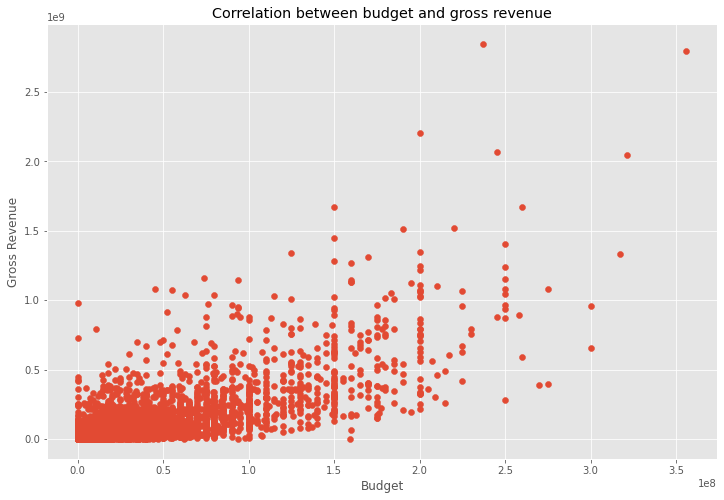

In [186]:
plt.scatter(x=df.budget, y=df.gross)
plt.title('Correlation between budget and gross revenue')
plt.xlabel('Budget')
plt.ylabel('Gross Revenue')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

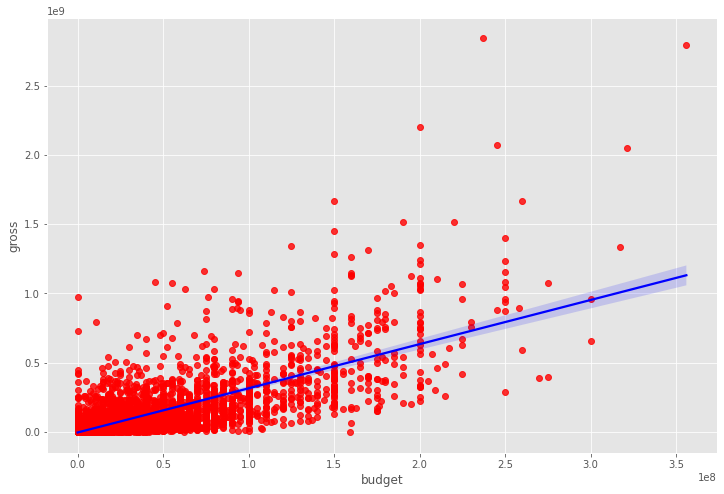

In [187]:
# Plot budget vs gross using seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

In [188]:
df.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.012206,0.016355,0.011453,-0.010480,0.016377,0.013038,0.009079,0.009985,0.006844,-0.010359,0.020548,0.006989,0.010373,0.008483,0.010900
rating,-0.012206,1.000000,0.136127,0.033801,0.025526,0.013917,-0.004429,0.011951,-0.001610,0.001063,-0.011793,-0.141632,-0.131883,-0.092284,0.054119,0.035787
genre,0.016355,0.136127,1.000000,-0.081261,0.030429,0.027384,-0.145296,-0.015258,0.006747,-0.004641,-0.035783,-0.334021,-0.234297,-0.070032,-0.052914,-0.077751
year,0.011453,0.033801,-0.081261,1.000000,0.000077,0.092616,0.222427,-0.020795,-0.007930,-0.027912,-0.069590,0.309212,0.261900,-0.011425,0.116358,0.997416
released,-0.010480,0.025526,0.030429,0.000077,1.000000,0.039182,0.015935,-0.001526,-0.003707,0.015474,-0.021707,0.008552,0.000100,-0.007634,-0.000281,-0.004264
score,0.016377,0.013917,0.027384,0.092616,0.039182,1.000000,0.407101,0.010568,0.022475,0.000823,-0.134439,0.056863,0.186012,-0.005964,0.394564,0.100427
votes,0.013038,-0.004429,-0.145296,0.222427,0.015935,0.407101,1.000000,0.000349,0.000487,-0.019380,0.073424,0.486931,0.632870,0.130535,0.306984,0.217915
director,0.009079,0.011951,-0.015258,-0.020795,-0.001526,0.010568,0.000349,1.000000,0.299523,0.039875,0.018014,0.004976,-0.014916,0.004248,0.017062,-0.020432
writer,0.009985,-0.001610,0.006747,-0.007930,-0.003707,0.022475,0.000487,0.299523,1.000000,0.028887,0.014490,-0.026777,-0.022963,0.001729,-0.004213,-0.007963
star,0.006844,0.001063,-0.004641,-0.027912,0.015474,0.000823,-0.019380,0.039875,0.028887,1.000000,-0.015101,-0.020228,-0.001326,0.007918,0.008216,-0.028273


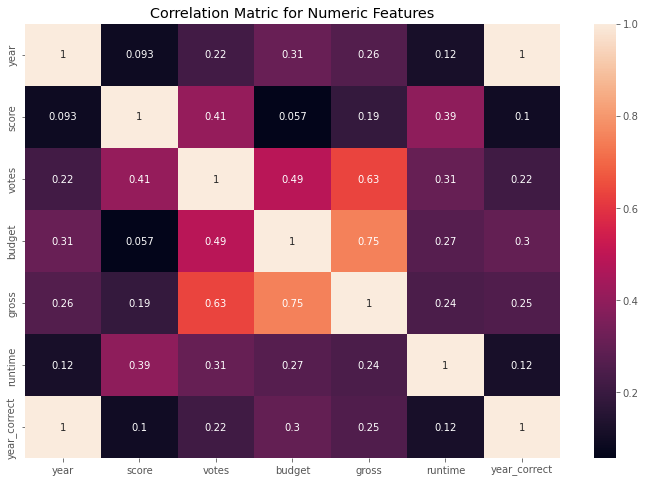

In [181]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.show()

In [189]:
# Company vs Gross
df_numerized = df

for col in df_numerized.columns:
    if(df_numerized[col].dtype == 'object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,533,5,0,2009,696,7.8,1100000,1155,1778,2334,55,237000000,2847246203,2253,162,2009
7445,535,5,0,2019,183,8.4,903000,162,743,2241,55,356000000,2797501328,1606,181,2019
3045,6896,5,6,1997,704,7.8,1100000,1155,1778,1595,55,200000000,2201647264,2253,194,1997
6663,5144,5,0,2015,698,7.8,876000,1125,2550,524,55,245000000,2069521700,1540,138,2015
7244,536,5,0,2018,192,8.4,897000,162,743,2241,55,321000000,2048359754,1606,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,3712,6,5,1989,1277,4.5,274,117,82,2798,55,0,0,1159,92,1990
1614,1745,6,10,1989,55,5.2,1300,1033,1743,166,54,0,0,146,85,1989
1606,2691,6,8,1989,257,6.0,2900,2743,946,1195,6,0,0,2237,89,1989
1601,3836,10,4,1989,1160,7.1,1500,1105,1696,681,18,0,0,504,104,1990


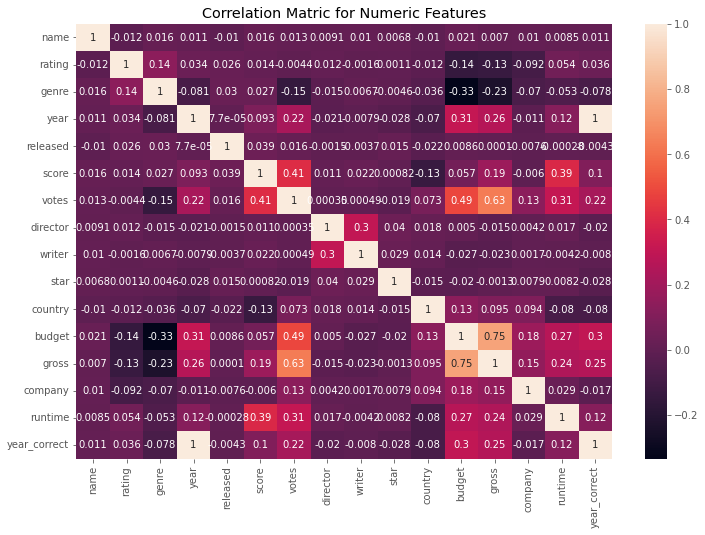

In [190]:
# Display correlation between attributes after numerization
correlation_matrix_numerized = df_numerized.corr()

sns.heatmap(correlation_matrix_numerized, annot=True)
plt.title('Correlation Matric for Numeric Features')
plt.show()

In [198]:
sorted_pairs = correlation_matrix_numerized.unstack().sort_values()
high_corr = sorted_pairs[sorted_pairs > 0.5]
high_corr

gross         votes           0.632870
votes         gross           0.632870
budget        gross           0.750157
gross         budget          0.750157
year_correct  year            0.997416
year          year_correct    0.997416
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64